In [ ]:
# several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# **kaggle 'Competitions': Titanic Project**

This notebook contains the solution for the [Titanic ML competition on Kaggle]( https://www.kaggle.com/c/titanic) following the steps presented by Ken Jee [Titanic Project Example](https://www.kaggle.com/kenjee/titanic-project-example)


**Main objective:** use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

> Note: It is very important to know all the information needed to get ready to start working through this problem. Thus, **Section 1. Data information** is composed by information provided in the [Titanic ML competition on Kaggle]( https://www.kaggle.com/c/titanic). The goal is to have access to all the information and solution in one single notebook.

## **1. Data information**


### **1.1 The Challenge**
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



### **1.2 What Data Will I Use in This Competition?**
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the `train.csv` data, predict whether the other 418 passengers on board (found in `test.csv`) survived.

The **training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The **test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### **1.3 Data Dictionary**

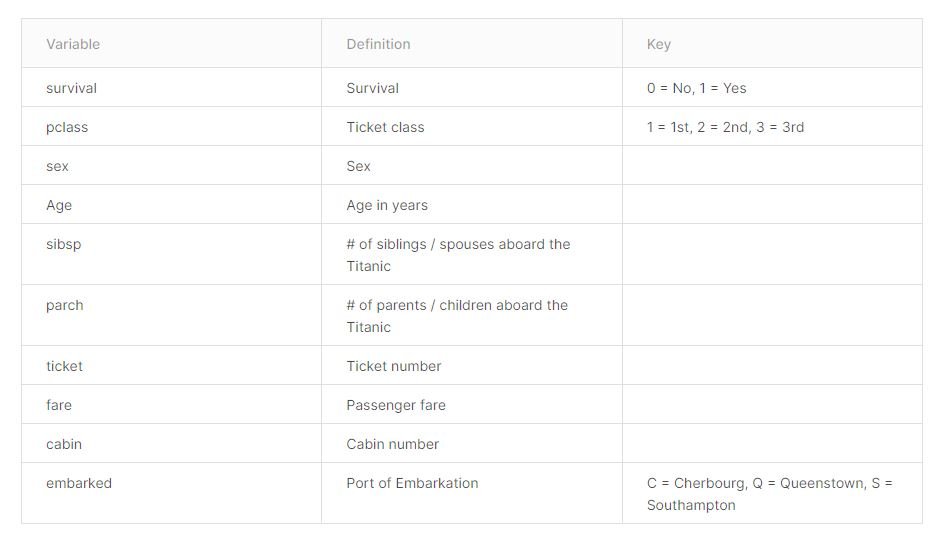

#### **1.3.1 Variable Notes**

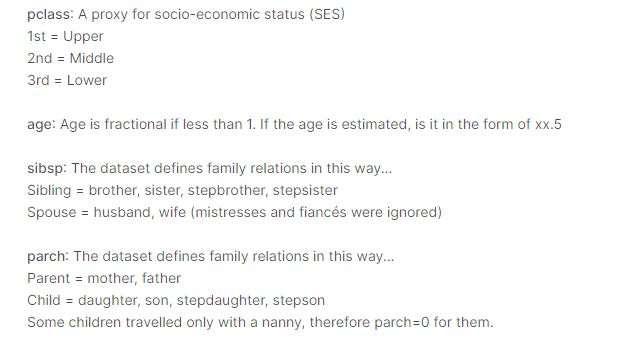




## **2. Understand the shape of the data (Histograms, box plots, etc.)**





>The first analysis is always made working with the Training set. Only after this first analysis, it comes the final step which is to make predictions based on the test set.

The first thing to do is to import the data.

In [ ]:
# reading files from pc in google colab
from google.colab import files
import io
uploaded = files.upload()

# import the data
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

training['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns




Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')